<a href="https://colab.research.google.com/github/jgamidi/Complete-Python-3-Bootcamp/blob/master/LoanData_DL_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Dataset columns and definition:

 

credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

installment: The monthly installments owed by the borrower if the loan is funded.

log.annual.inc: The natural log of the self-reported annual income of the borrower.

dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

fico: The FICO credit score of the borrower.

days.with.cr.line: The number of days the borrower has had a credit line.

revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

 

Steps to perform:

Perform exploratory data analysis and feature engineering and then apply feature engineering. Follow up with a deep learning model to predict whether or not the loan will be default using the historical data.

 

Tasks:

1.     Feature Transformation

Transform categorical values into numerical values (discrete)

2.     Exploratory data analysis of different factors of the dataset.

3.     Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features

4.     Modeling

After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend

In [ ]:
loanData = pd.read_csv('loan_data.csv')

In [ ]:
loanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


No missing values in the data.

In [ ]:
loanData.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
loanData.purpose.value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [ ]:
(loanData[['purpose']])

,purpose
0,debt_consolidation
1,credit_card
2,debt_consolidation
3,debt_consolidation
4,credit_card
...,...
9573,all_other
9574,all_other
9575,debt_consolidation
9576,home_improvement


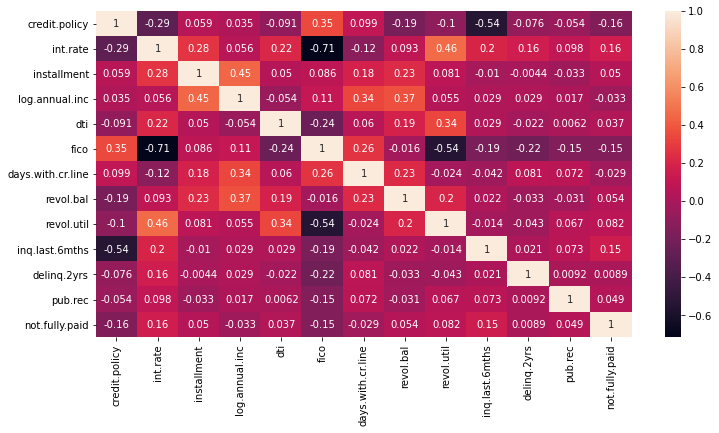

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(loanData.corr(),annot=True)

*There is some multi-collinearlity between int.rate and fico, but its not very high, so not droppping any features based on collinearity*

In [ ]:
#sns.barplot

sns.set()
loanData[['purpose','not.fully.paid']].set_index('purpose').T.plot(kind='bar', stacked=True)

ValueError: ignored

<Figure size 432x288 with 1 Axes>

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc=OneHotEncoder(handle_unknown='ignore',sparse=False)

In [ ]:
purpose_enc=enc.fit_transform(loanData[['purpose']])

In [ ]:
enc.get_feature_names(['purpose'])

array(['purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'], dtype=object)

In [ ]:
pd.DataFrame(purpose_enc,columns=enc.get_feature_names(['purpose']))

,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
9573,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9574,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9575,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9576,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
loanData=loanData.join(pd.DataFrame(purpose_enc,columns=enc.get_feature_names(['purpose'])))

In [ ]:
loanData

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
loanData.drop(columns=['purpose'],inplace=True)

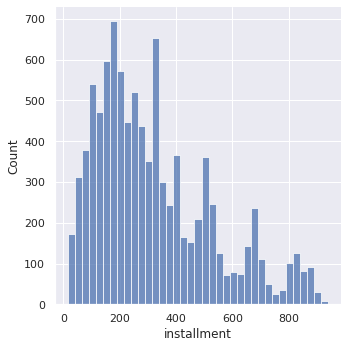

In [ ]:
sns.displot(loanData['installment'])

*Installment data is right skewed, so trying transformations*

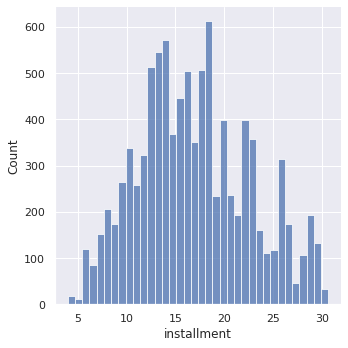

In [ ]:
sns.displot(np.sqrt(loanData['installment']))

In [ ]:
loanData['installment_T']=np.sqrt(loanData['installment'])

In [ ]:
loanData.drop(columns=['installment'],inplace=True)

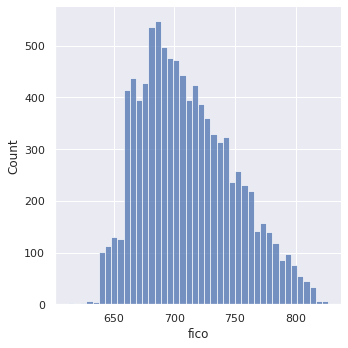

In [ ]:
sns.displot(loanData['fico'])

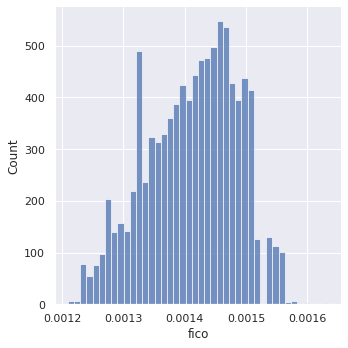

In [ ]:
sns.displot(1/loanData['fico'])

In [ ]:
from scipy import stats

In [ ]:
fico_T,fico_lambda=stats.boxcox(loanData['fico'])

In [ ]:
fico_lambda


-3.1221873174685357

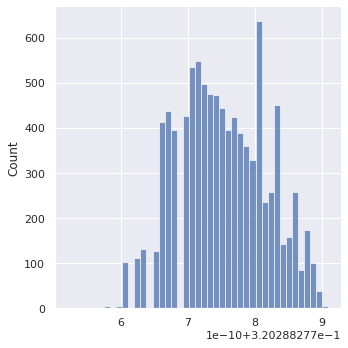

In [ ]:
sns.displot(fico_T)

boxcox Transformation on fico shows some anamolies, so not going with any transformations

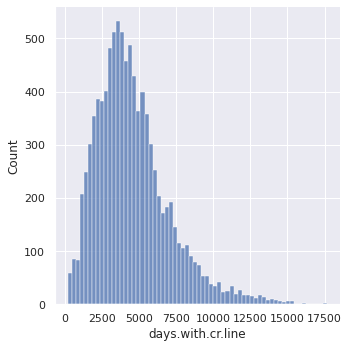

In [ ]:
sns.displot(loanData['days.with.cr.line'])

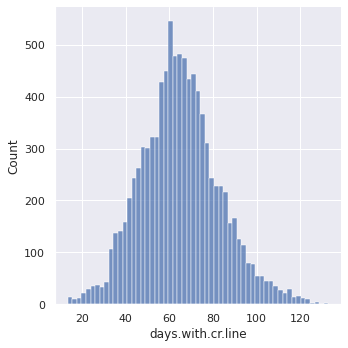

In [ ]:
sns.displot(np.sqrt(loanData['days.with.cr.line']))

sqrt on 'days.with.cr.line', is making data more normal, so applying this transformation on the data

In [ ]:
loanData['days.with.cr.line_T']=np.sqrt(loanData['days.with.cr.line'])

In [ ]:
loanData.drop(columns=['days.with.cr.line'],inplace=True)

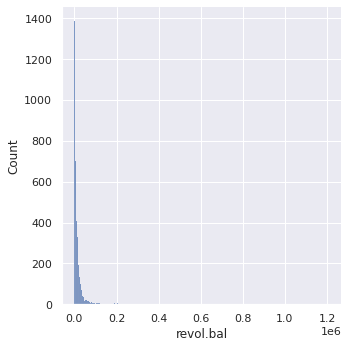

In [ ]:
sns.displot(loanData['revol.bal'])

In [ ]:
revolBal_T,revolBal_lambda=stats.boxcox(loanData['revol.bal'])

ValueError: ignored

In [ ]:
loanData[loanData['revol.bal']==0]

,credit.policy,int.rate,log.annual.inc,dti,fico,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,installment_T,days.with.cr.line_T
43,1,0.1028,12.206073,0.00,677,0,0.0,0,1,0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9.859006,61.481366
112,1,0.0743,11.695247,0.00,772,0,0.0,1,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,10.830974,62.689380
126,1,0.1122,10.308953,20.40,742,0,0.0,3,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18.122638,57.183914
152,1,0.1059,9.615805,24.40,737,0,0.0,3,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.756567,56.656494
197,1,0.0807,9.798127,4.27,722,0,0.0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.961060,38.340579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9364,0,0.1774,9.546813,9.51,692,0,71.1,4,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,13.149525,39.115747
9437,0,0.1461,10.239960,0.00,692,0,0.0,6,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.140916,39.115747
9459,0,0.2052,11.736069,16.62,762,0,0.0,9,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,29.971153,65.046458
9492,0,0.1843,10.373491,0.00,667,0,0.0,6,0,0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20.891146,83.096330


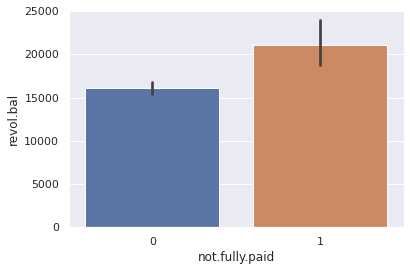

In [ ]:
sns.barplot(x=loanData['not.fully.paid'],y=loanData['revol.bal'])

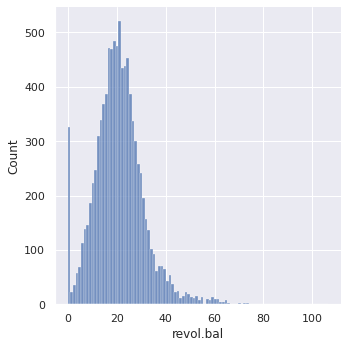

In [ ]:
sns.displot(loanData['revol.bal']**(1/3))

Cube root of revol.bal shows better distribution of the data, so transforming the column cube root of revol.bal

In [ ]:
loanData['revol.bal_T']=loanData['revol.bal']**(1/3)

In [ ]:
loanData.drop(columns=['revol.bal'],inplace=True)

In [ ]:
loanData.head()

,credit.policy,int.rate,log.annual.inc,dti,fico,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,installment_T,days.with.cr.line_T,revol.bal_T
0,1,0.1189,11.350407,19.48,737,52.1,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,28.794097,75.099656,30.671523
1,1,0.1071,11.082143,14.29,707,76.7,0,0,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,15.106952,52.535702,32.275934
2,1,0.1357,10.373491,11.63,682,25.6,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19.153590,68.629440,15.198834
3,1,0.1008,11.350407,8.10,712,73.2,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.741272,51.961123,32.290007
4,1,0.1426,11.299732,14.97,667,39.5,0,1,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10.144949,63.765194,16.798072


In [ ]:
loanData[['installment_T','days.with.cr.line_T','revol.bal_T']].corr()

,installment_T,days.with.cr.line_T,revol.bal_T
installment_T,1.000000,0.205538,0.324531
days.with.cr.line_T,0.205538,1.000000,0.318978
revol.bal_T,0.324531,0.318978,1.000000


In [ ]:
loanData['inq.last.6mths'].value_counts()

0     3637
1     2462
2     1384
3      864
4      475
5      278
6      165
7      100
8       72
9       47
10      23
11      15
12      15
15       9
13       6
14       6
18       4
16       3
24       2
19       2
17       2
27       1
28       1
25       1
32       1
20       1
33       1
31       1
Name: inq.last.6mths, dtype: int64

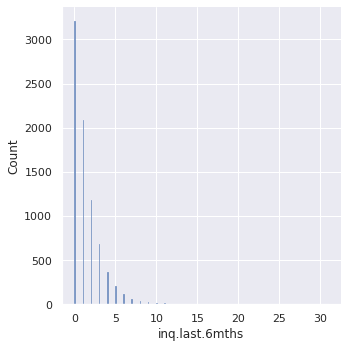

In [ ]:
sns.displot(loanData[loanData['not.fully.paid']==0]['inq.last.6mths'])

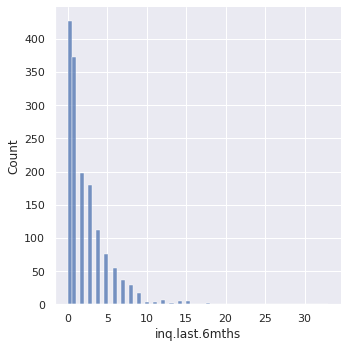

In [ ]:
sns.displot(loanData[loanData['not.fully.paid']==1]['inq.last.6mths'])

Looking at the above distribution plots for both 0 & 1 values of outcome, inq.last.6mths does not seem to make much impact on 'not.fully.paid', so dropping this feature.

In [ ]:
loanData.drop(columns=['inq.last.6mths'],inplace=True)

In [ ]:
loanData['delinq.2yrs'].value_counts()

0     8458
1      832
2      192
3       65
4       19
5        6
6        2
7        1
13       1
11       1
8        1
Name: delinq.2yrs, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


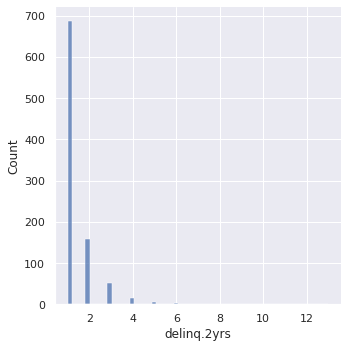

In [ ]:
sns.displot(data=loanData[loanData['not.fully.paid']==0][loanData['delinq.2yrs']!=0]['delinq.2yrs'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


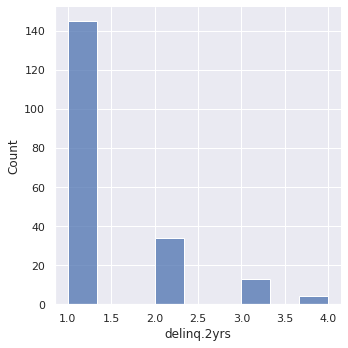

In [ ]:
sns.displot(loanData[loanData['not.fully.paid']==1][loanData['delinq.2yrs']!=0]['delinq.2yrs'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


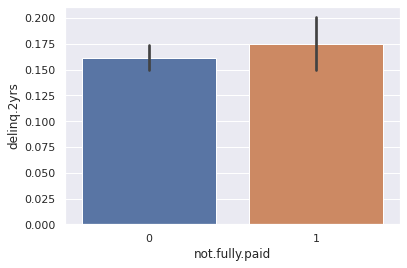

In [ ]:
sns.barplot(loanData['not.fully.paid'],loanData['delinq.2yrs'])

delin.2yrs does not seem to be making much impact on outcome, observed distribution of delin.2yrs with respect to not.fully.paid, not dropping this feature for now.

In [ ]:
loanData['pub.rec'].value_counts()

0    9019
1     533
2      19
3       5
5       1
4       1
Name: pub.rec, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


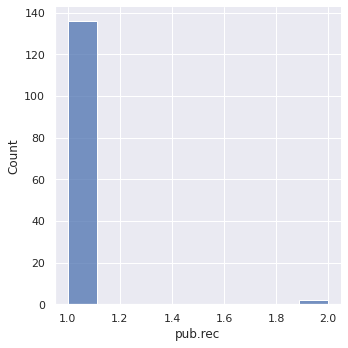

In [ ]:
sns.displot(loanData[loanData['not.fully.paid']==1][loanData['pub.rec']!=0]['pub.rec'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


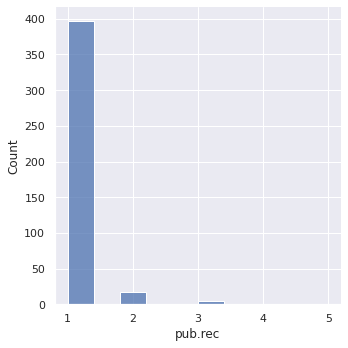

In [ ]:
sns.displot(loanData[loanData['not.fully.paid']==0][loanData['pub.rec']!=0]['pub.rec'])

Dropping pub.rec, as majority of them are zeros, also for non-zero values, distribution does not change w.r.t not.fully.paid.

In [ ]:
loanData.drop(columns=['pub.rec'],inplace=True)

In [ ]:
loanData.head()

,credit.policy,int.rate,log.annual.inc,dti,fico,revol.util,delinq.2yrs,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business,installment_T,days.with.cr.line_T,revol.bal_T
0,1,0.1189,11.350407,19.48,737,52.1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,28.794097,75.099656,30.671523
1,1,0.1071,11.082143,14.29,707,76.7,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,15.106952,52.535702,32.275934
2,1,0.1357,10.373491,11.63,682,25.6,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,19.153590,68.629440,15.198834
3,1,0.1008,11.350407,8.10,712,73.2,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.741272,51.961123,32.290007
4,1,0.1426,11.299732,14.97,667,39.5,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,10.144949,63.765194,16.798072


In [ ]:
loanData['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [ ]:
features=loanData.drop(columns=['credit.policy','not.fully.paid']).values
label=loanData[['not.fully.paid']].values

**Data is highly imbalanced, so we need to balance the data**

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote=SMOTE(k_neighbors=2,random_state=10)

In [ ]:
features,label=smote.fit_resample(features,label)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(features.shape)
print(label[label==0].shape)
print(label[label==1].shape)

(16090, 16)
(8045,)
(8045,)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
stdSclr=StandardScaler()

In [ ]:
stdFeatures=stdSclr.fit_transform(features)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(stdFeatures,label,train_size=0.8,random_state=10)

In [ ]:
import tensorflow as tf

In [ ]:
loanANNModel = tf.keras.models.Sequential()

Input layer with 16 features.
Input & Hidden layers with relu activation function
label is a binary classification outcome, so using activation as sigmoid with 2 neurons

In [ ]:
loanANNModel.add(tf.keras.layers.Dense(units=100,activation='relu',input_shape=(16,)))
loanANNModel.add(tf.keras.layers.Dense(units=100,activation='relu'))
loanANNModel.add(tf.keras.layers.Dense(units=100,activation='relu'))
loanANNModel.add(tf.keras.layers.Dense(units=100,activation='relu'))
loanANNModel.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [ ]:
loanANNModel.compile(optimizer='sgd',loss='binary_crossentropy',metrics='accuracy')

In [ ]:
loanANNModel.fit(x_train,y_train,epochs=1000,validation_data=(x_test,y_test))

Epoch 1/1000
403/403 [==============================] - 2s 3ms/step - loss: 0.6927 - accuracy: 0.5116 - val_loss: 0.6930 - val_accuracy: 0.5047
Epoch 2/1000
403/403 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5019 - val_loss: 0.6930 - val_accuracy: 0.5208
Epoch 3/1000
403/403 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.5119 - val_loss: 0.6931 - val_accuracy: 0.4953
Epoch 4/1000
403/403 [==============================] - 1s 2ms/step - loss: 0.6930 - accuracy: 0.5098 - val_loss: 0.6932 - val_accuracy: 0.4953
Epoch 5/1000
403/403 [==============================] - 1s 2ms/step - loss: 0.6931 - accuracy: 0.5017 - val_loss: 0.6929 - val_accuracy: 0.5373
Epoch 6/1000
403/403 [==============================] - 1s 2ms/step - loss: 0.6929 - accuracy: 0.5031 - val_loss: 0.6929 - val_accuracy: 0.5059
Epoch 7/1000
403/403 [==============================] - 1s 2ms/step - loss: 0.6928 - accuracy: 0.5147 - val_loss: 0.6927 - val_accuracy: